In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification, make_moons, make_circles, load_breast_cancer, load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score

np.random.seed(42)
plt.rcParams['figure.figsize'] = (6, 4)

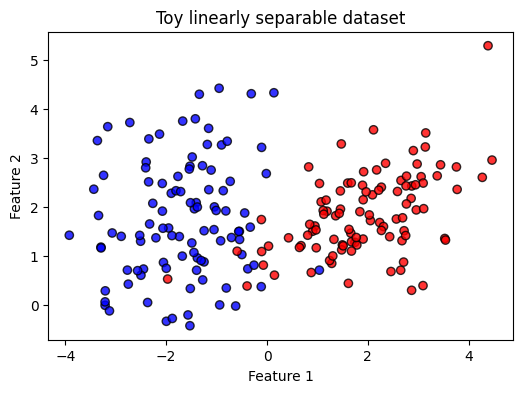

In [90]:
# create dataset
X_lin, y_lin = make_classification(
    n_samples=200,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    class_sep=1.8,
    random_state=42,
)

# visualize dataset
plt.scatter(X_lin[:, 0], X_lin[:, 1], c=y_lin, cmap='bwr', edgecolors='k', alpha=0.8)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Toy linearly separable dataset')
plt.show()

In [91]:
X_train, X_test, y_train, y_test = train_test_split(
    X_lin, y_lin, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [92]:
svm_linear = SVC(kernel='linear', C=1.0, random_state=42)
svm_linear.fit(X_train_scaled, y_train)

y_pred = svm_linear.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.975


In [93]:
# helper function to plot decision boundary for 2D data
def plot_decision_boundary(model, X, y, title='Decision boundary'):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.2, cmap='bwr')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', alpha=0.8)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

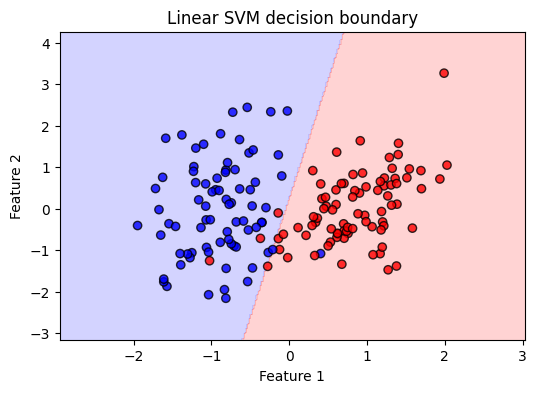

In [94]:
# visualize the linear SVM boundary on scaled training data
plot_decision_boundary(svm_linear, X_train_scaled, y_train, title='Linear SVM decision boundary')

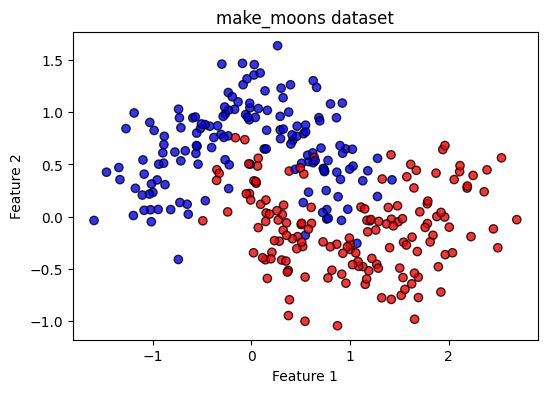

In [95]:
# generate moons dataset (non linear but simple)
X_moon, y_moon = make_moons(n_samples=300, noise=0.25, random_state=42)

plt.scatter(X_moon[:, 0], X_moon[:, 1], c=y_moon, cmap='bwr', edgecolors='k', alpha=0.8)
plt.title('make_moons dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [96]:
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moon, y_moon, test_size=0.2, random_state=42
)

scaler_moon = StandardScaler()
X_moon_train_scaled = scaler_moon.fit_transform(X_moon_train)
X_moon_test_scaled = scaler_moon.transform(X_moon_test)

Accuracy linear:  0.8833333333333333


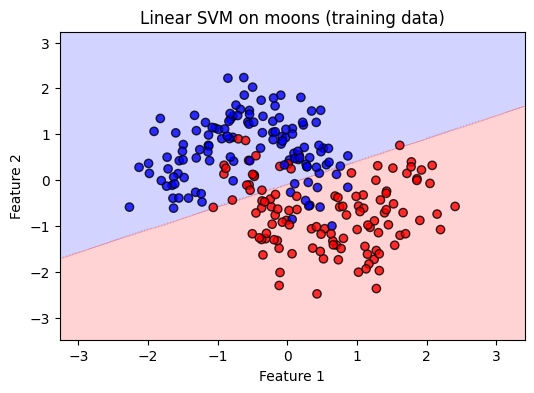

In [97]:
# linear kernel
svc_linear_moon = SVC(kernel='linear', C=1.0, random_state=42)

svc_linear_moon.fit(X_moon_train_scaled, y_moon_train)

y_pred_linear_moon = svc_linear_moon.predict(X_moon_test_scaled)
acc_linear_moon = accuracy_score(y_moon_test, y_pred_linear_moon)

print("Accuracy linear: ", acc_linear_moon)

# plot
plot_decision_boundary(svc_linear_moon, X_moon_train_scaled, y_moon_train,
                       title='Linear SVM on moons (training data)')

Accuracy polynomial:  0.8666666666666667


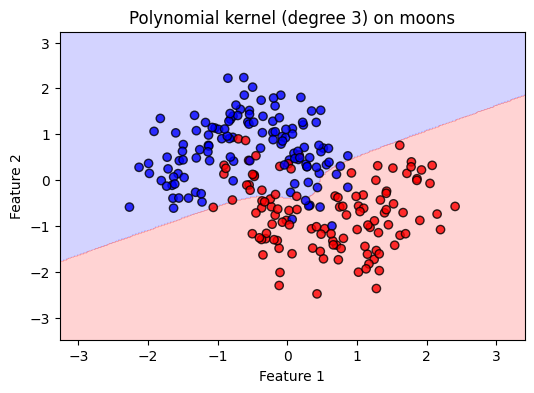

In [98]:
# polynomial kernel
svc_poly_moon = SVC(kernel='poly', degree=3, C=1.0, gamma='scale', random_state=42)

svc_poly_moon.fit(X_moon_train_scaled, y_moon_train)

y_pred_poly_moon = svc_poly_moon.predict(X_moon_test_scaled)
acc_poly_moon = accuracy_score(y_moon_test, y_pred_poly_moon)

print("Accuracy polynomial: ", acc_poly_moon)

# plot
plot_decision_boundary(svc_poly_moon, X_moon_train_scaled, y_moon_train,
                       title='Polynomial kernel (degree 3) on moons')

Accuracy RBF kernel:  0.9166666666666666


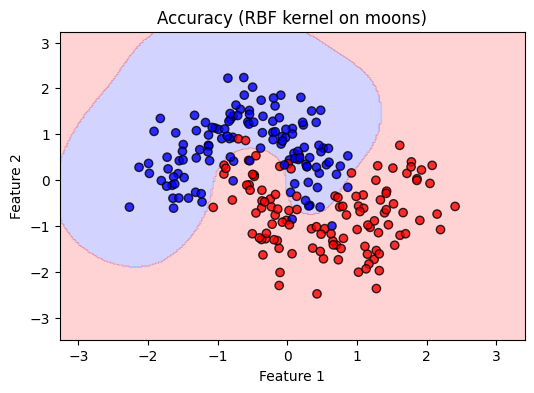

In [99]:
# RBF kernel on moons
svc_rbf_moon = SVC(kernel='rbf', C=10.0, gamma=1.0, random_state=42)
svc_rbf_moon.fit(X_moon_train_scaled, y_moon_train)

y_pred_rbf_moon = svc_rbf_moon.predict(X_moon_test_scaled)
acc_rbf_moon = accuracy_score(y_moon_test, y_pred_rbf_moon)

print("Accuracy RBF kernel: ", acc_rbf_moon)

# plot
plot_decision_boundary(svc_rbf_moon, X_moon_train_scaled, y_moon_train,
                       title='Accuracy (RBF kernel on moons)')

In [100]:
# breast cancer dataset
cancer = load_breast_cancer()
X_bc = cancer.data
y_bc = cancer.target

print('Feature shape:', X_bc.shape)
print('Classes:', cancer.target_names)

Feature shape: (569, 30)
Classes: ['malignant' 'benign']


In [101]:
X_bc_train, X_bc_test, y_bc_train, y_bc_test = train_test_split(
    X_bc, y_bc, test_size=0.2, random_state=42, stratify=y_bc
)

scaler_bc = StandardScaler()
X_bc_train_scaled = scaler_bc.fit_transform(X_bc_train)
X_bc_test_scaled = scaler_bc.transform(X_bc_test)

In [102]:
svc_bc = SVC(kernel='rbf', C=1.0, gamma = 'scale', random_state=42)
svc_bc.fit(X_bc_train_scaled, y_bc_train)

y_bc_pred = svc_bc.predict(X_bc_test_scaled)
acc_bc = accuracy_score(y_bc_test, y_bc_pred)
print("Accuracy with RBF: ", acc_bc)

print('\nClassification report:')
print(classification_report(y_bc_test, y_bc_pred, target_names=cancer.target_names))

Accuracy with RBF:  0.9824561403508771

Classification report:
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [103]:
cm = confusion_matrix(y_bc_test, y_bc_pred)
print('Confusion matrix:\n', cm)

Confusion matrix:
 [[41  1]
 [ 1 71]]


In [104]:
def evaluate_svm_c_gamma(X_train, X_test, y_train, y_test, C_values, gamma_values):
    results = []
    for C in C_values:
        for gamma in gamma_values:
            model = SVC(kernel='rbf', C=C, gamma=gamma, random_state=42)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            results.append({'C': C, 'gamma': gamma, 'accuracy': acc})
    return pd.DataFrame(results)

C_values = [0.1, 0.5, 1.0, 5, 10.0]
gamma_values = ['scale', 0.01, 0.1, 1.0, 2, 5, 10]

df_hyper = evaluate_svm_c_gamma(X_bc_train_scaled, X_bc_test_scaled,
                                y_bc_train, y_bc_test,
                                C_values, gamma_values)
df_hyper

,C,gamma,accuracy
0,0.1,scale,0.947368
1,0.1,0.01,0.956140
2,0.1,0.1,0.947368
3,0.1,1.0,0.631579
4,0.1,2,0.631579
5,0.1,5,0.631579
6,0.1,10,0.631579
7,0.5,scale,0.973684
8,0.5,0.01,0.964912
9,0.5,0.1,0.964912


In [105]:
# Sort by accuracy to see top combinations
df_hyper.sort_values('accuracy', ascending=False)

,C,gamma,accuracy
21,5.0,scale,0.982456
15,1.0,0.01,0.982456
14,1.0,scale,0.982456
22,5.0,0.01,0.982456
29,10.0,0.01,0.982456
7,0.5,scale,0.973684
28,10.0,scale,0.973684
8,0.5,0.01,0.964912
9,0.5,0.1,0.964912
16,1.0,0.1,0.956140


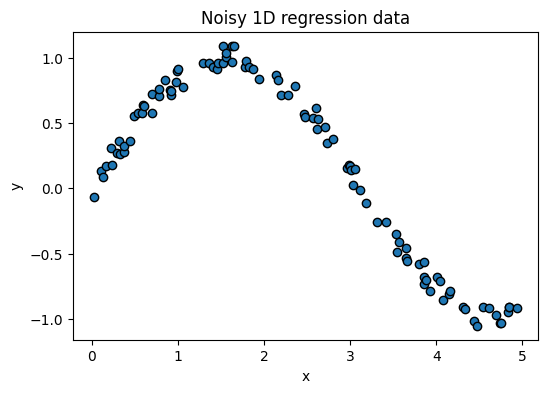

In [106]:
# create a simple 1D regression dataset
rng = np.random.RandomState(42)
X_reg = np.sort(5 * rng.rand(100, 1), axis=0)
y_reg = np.sin(X_reg).ravel()

# Add some noise
y_reg += 0.2 * (rng.rand(y_reg.shape[0]) - 0.5)

plt.scatter(X_reg, y_reg, edgecolors='k')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Noisy 1D regression data')
plt.show()

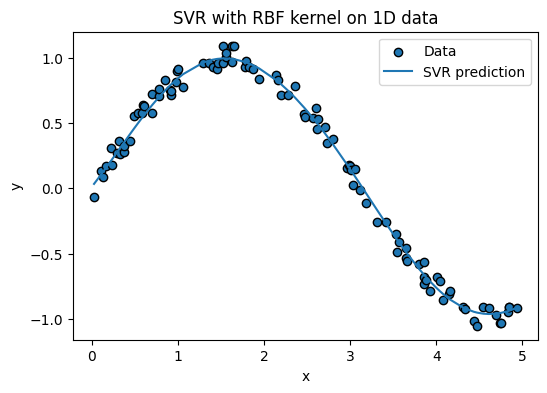

In [107]:
# train an SVR with RBF kernel
svr_rbf = SVR(kernel='rbf', C=100, epsilon= 0.1, gamma = 'scale')
svr_rbf.fit(X_reg, y_reg)

y_reg_pred = svr_rbf.predict(X_reg)

plt.scatter(X_reg, y_reg, edgecolors='k', label='Data')
plt.plot(X_reg, y_reg_pred, label='SVR prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('SVR with RBF kernel on 1D data')
plt.legend()
plt.show()

In [108]:
mse = mean_squared_error(y_reg, y_reg_pred)
r2 = r2_score(y_reg, y_reg_pred)

print("MSE: ", mse)
print("R^2: ",r2)

MSE:  0.003362987864585151
R^2:  0.9929555038848866


### Diabetes Dataset (Real data)

In [109]:
diabetes = load_diabetes()
X_diab = diabetes.data
y_diab = diabetes.target

print('Feature shape:', X_diab.shape)

X_diab_train, X_diab_test, y_diab_train, y_diab_test = train_test_split(
    X_diab, y_diab, test_size=0.2, random_state=42
)

scaler_diab = StandardScaler()
X_diab_train_scaled = scaler_diab.fit_transform(X_diab_train)
X_diab_test_scaled = scaler_diab.transform(X_diab_test)

Feature shape: (442, 10)


In [110]:
svr_diab = SVR(kernel='rbf', C=10.0, epsilon=0.1, gamma='scale')
svr_diab.fit(X_diab_train_scaled, y_diab_train)

y_diab_pred = svr_diab.predict(X_diab_test_scaled)

mse_diab = mean_squared_error(y_diab_test, y_diab_pred)
r2_diab = r2_score(y_diab_test, y_diab_pred)

print("MSE: ", mse_diab)
print("R^2: ", r2_diab)

MSE:  2682.387949725229
R^2:  0.4937125101265256


In [111]:
# tune SVR Parameters
param_grid = {
    'C': [1, 10, 100, 1000],
    'epsilon': [0.01, 0.1, 0.5, 1.0],
    'gamma': ['scale', 0.01, 0.1, 1, 10]
}

svr = SVR(kernel='rbf')
grid = GridSearchCV(svr, param_grid, cv=5, scoring='r2')
grid.fit(X_diab_train_scaled, y_diab_train)

print(grid.best_params_)

{'C': 100, 'epsilon': 0.01, 'gamma': 0.01}
